# Recherche textuelle
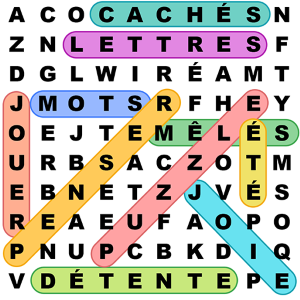

## Introduction

- Trouver les occurrences d'une chaîne de caractères (ou motif ou mot) dans un texte est un problème qui se rencontre dans La plupart des applications. En général pour y accéder on utilise la combinaison de touches `CTRL + F`.
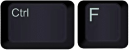

- Dans le domaine de la génétique, on peut par exemple analyser une séquence ADN composées des lettres $A$, $T$, $G$ et $C$ pour y chercher un motif particulier par exemple $ATG~TAG~CCC~TAA$ qui représentera un gène particulier.
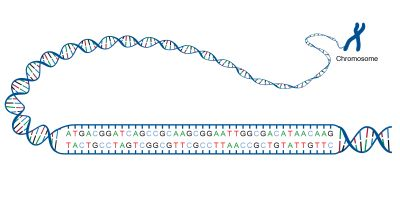

- Ou plus simplement, on peut vouloir trouver combien de fois apparaît le mot **"Valjean"** dans le premier tome des _Misérables_ de Victor Hugo.
    

## Algorithme naïf
La méthode la plus naturelle de recherche d'un motif dans un texte consiste à parcourir le texte caractère par caractère, de le comparer au premier caractère du motif recherché, une fois la correspondance trouvée, la totalité du motif.
L'animation suivante illustre la méthode pour trouver le motif **"maison"** dans le texte **"une magnifique maison bleue"** :

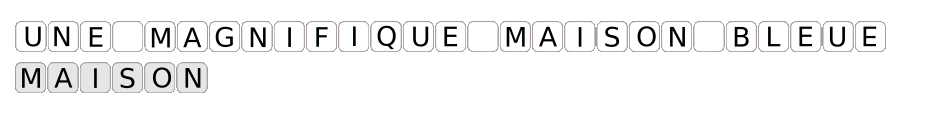

Cet algorithme peut être écrit de la manière suivante :  
```
n ←− longueur du texte
m ←− longueur du motif
indices ←− liste vide
Pour i de 0 à n−m faire
    k ←− 0
    Tant que k < m et texte[i+k]=motif[k] faire
        incrémenter k de 1
    Fin Tant que
    Si k = m alors
        ajouter i à indices
    Fin Si
Fin Pour
Renvoyer indices

```

---
### 💻 EXERCICE 1
> - Implémentez ci-dessous l'algorithme dans une fonction `recherche_naive(texte, motif)`

In [ ]:
# à compléter


In [ ]:
# Vérification : doit renvoyer [15]
recherche_naive("une magnifique maison bleue", "maison")

In [ ]:
# Vérification : doit renvoyer [4, 15]
recherche_naive("une magnifique maison bleue", "ma")

Recherchons maintenant le motif dans un texte plus long, pour cela, importons le fichier `5.5_Les_Miserables.txt` qui contient le Tome 1 du roman $Les~Misérables$ de Victor Hugo.  
>- Téléchargez le fichier **5.6_Les_Miserables.txt** disponible sur le dépot Git à coté du TP
>- Importez le fichier dans le notebook en faisant  `Fichier... / Ouvrir` et le sélectionnant, normalement, le notebook vous informera que le fichier est utilisable depuis Python.

- Ouvrons-le et enregistrons-le dans une chaîne de caractères :


In [ ]:
# à exécuter
with open('5.6_Les_Miserables.txt') as f:
    roman = f.read().replace('\n', ' ')

- Vérifions notre algorithme et recherchons le mot "maison" dans le chapitre :

In [ ]:
# à exécuter
recherche_naive(roman, "maison")

- Vérifions maintenant la performance de notre algorithme avec plusieurs chaînes de taille et de nombre d'occurences différentes :

In [ ]:
# à exécuter
import time

t0 = time.time()
o=recherche_naive(roman, 'maison')
print('Motif 1:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=recherche_naive(roman, 'La chandelle était sur la cheminée et ne donnait que peu de clarté.')
print('Motif 2:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=recherche_naive(roman, 'numérique')
print('Motif 3:',len(o),(time.time()-t0)*1000,'ms')

> 💡Vous noterez que la taille du motif et le nombre d'occurences influe peu sur le temps de recherche.

## Optimisation de l'algorithme naïf
Ré-écrivons l'algorithme mais comparons le motif par la fin, comme le décrit l'animation suivante :
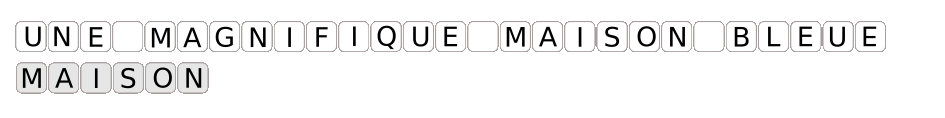

La modification va s'effectuer dans la seconde boucle de notre algorithme :  
```
n ←− longueur du texte
m ←− longueur du motif
indices ←− liste vide
Pour i de 0 à n−m faire
    k ←− m-1
    Tant que k >=0 et texte[i+k]=motif[k] faire
        décrémenter k de 1
    Fin Tant que
    Si k < 0 alors
        ajouter i à indices
    Fin Si
Fin Pour
Renvoyer indices

```

---
### 💻 EXERCICE 2
> - Implémentez ci-dessous l'algorithme dans une fonction `recherche_naive_Op(texte, motif)`

In [ ]:
# à compléter


In [ ]:
# Vérification : doit renvoyer [15]
recherche_naive_Op("une magnifique maison bleue", "maison")

In [ ]:
# Vérification : doit renvoyer [4, 15]
recherche_naive_Op("une magnifique maison bleue", "ma")

In [ ]:
# Vérification
recherche_naive_Op(roman, "maison")

In [ ]:
# à exécuter
import time

t0 = time.time()
o=recherche_naive_Op(roman, 'maison')
print('Motif 1:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=recherche_naive_Op(roman, 'La chandelle était sur la cheminée et ne donnait que peu de clarté.')
print('Motif 2:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=recherche_naive_Op(roman, 'numérique')
print('Motif 3:',len(o),(time.time()-t0)*1000,'ms')

> 💡Vous noterez ici que la performance n'est pas améliorée, c'est cependant un premier pas vers l'algorithme que nous allons étudier...

## Algorithme de Boyer-Moore-Horspool

L'idée est d'améliorer le code précédent (celui on parcourt le motif à l'envers) en se décalant directement au prochain endroit potentiellement valide au lieu de se décaler d'un seul caractère.  

Pour cela on regarde le caractère `X` du texte sur lequel on s'est arrêté :
- Si `X` n'est pas dans le motif, il est inutile de se déplacer de 1 : on retomberait tout de suite sur `X`, c'est du temps perdu. On se décale donc juste assez pour dépasser `X`, donc de la longueur du motif cherché.
- Si `X` est dans le motif, on va regarder la place de la dernière occurence de `X` dans le motif et de déplacer de ce nombre, afin de faire coïncider le `X` du motif et le `X` du texte = décalage intelligent.

L'animation suivante illustre l'algorithme de **Boyer-Moore-Horspool** :  

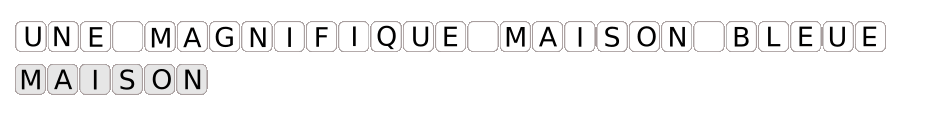

Pour cet algorithme, nous allons partir de notre algorithme précédent avec les modifications suivantes :
- Nous n'utiliserons plus de boucle `for` car nous allons faire le décalage intelligent.
- Si la lettre X est trouvée on va se décaler vers cette lettre soit `len(motif) - dico[texte[i+k]] - 1`
- Sinon, on se décale de la taille du motif complet

L'implémentation de l'algorithme est la suivante. **⚠️ Prêtez bien attention aux commentaires dans le code**

In [ ]:
# à exécuter
def dico_lettres(mot):
    d = {}
    for i in range(len(mot)-1):
        d[mot[i]] = i
    return d

def BMH(texte, motif):
    dico = dico_lettres(motif)
    indices = []
    n=len(texte)
    m=len(motif)

    # Ici plus de boucle for car on ne se déplace pas de 1 à tous les coups
    i = 0 
    while i <= n - m:
        k = m-1
        # On remonte le motif à l'envers, tant qu'il y a correspondance et qu'on n'est pas arrivés au début du motif
        while k > 0 and texte[i+k] == motif[k]: 
            k -= 1
        # Si on est arrivés au début du motif, c'est qu'on a trouvé le mot
        if k == 0:
            indices.append(i)
            i += 1
        else:
            # On s'est arrêté avant la fin, sur une lettre présente dans le mot : il va falloir faire un décalage intelligent
            if texte[i+k] in dico:
                i += len(motif) - dico[texte[i+k]] - 1
            # La lettre n'est pas dans le motif : on se positionne juste après elle en se décalant de toute la longueur du motif
            else:
                i += len(motif)

    return indices

In [ ]:
# Vérification : doit renvoyer [15]
BMH("une magnifique maison bleue", "maison")

In [ ]:
# Vérification : doit renvoyer [4, 15]
BMH("une magnifique maison bleue", "ma")

In [ ]:
# Vérification
BMH(roman, "maison")

> - Reprenons les mesures effectuées sur Les Misérables, mais cette fois avec l'algorithme `BMH(texte, motif)`. 

In [ ]:
# à exécuter

import time

t0 = time.time()
o=BMH(roman, 'maison')
print('Motif 1:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=BMH(roman, 'La chandelle était sur la cheminée et ne donnait que peu de clarté.')
print('Motif 2:',len(o),(time.time()-t0)*1000,'ms')

t0 = time.time()
o=BMH(roman, 'numérique')
print('Motif 3:',len(o),(time.time()-t0)*1000,'ms')

> - Que remarquez-vous ? 